In [1]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import imutils
import cv2
import copy

In [4]:
# Load images
img_names = ['hawaii_pre1.jpeg','hawaii_post1.jpeg','taal_pre1.jpeg','taal_post1.jpeg',
             'La_Palma_before.jpeg','La_Palma_after.jpeg','La_Soufriere_before.jpeg','La_Soufriere_after.jpeg',
             'taal_before.jpeg','taal_after.jpeg']
img_list = []
for image in img_names:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list.append(new_img)

In [5]:
# Check image dimensions
print(img_list[0].shape)
print(img_list[1].shape)
print(img_list[2].shape)
print(img_list[3][3:531, :, :].shape)
print(img_list[4].shape)
print(img_list[5].shape)
print(img_list[6].shape)
print(img_list[7].shape)
print(img_list[8].shape)
print(img_list[9].shape)

(1006, 1300, 3)
(1006, 1300, 3)
(528, 800, 3)
(528, 800, 3)
(1101, 1246, 3)
(1101, 1246, 3)
(3000, 3000, 3)
(3000, 3000, 3)
(2069, 2069, 3)
(2069, 2069, 3)


SSIM: 0.13711424278180212


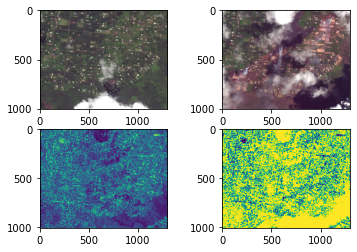

In [6]:
# Convert images to grayscale
imageA = copy.deepcopy(img_list[0])
imageB = copy.deepcopy(img_list[1])
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

SSIM: 0.3794001245338164


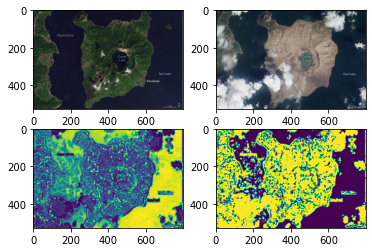

In [7]:
# Convert images to grayscale
imageA = copy.deepcopy(img_list[2])
imageB = copy.deepcopy(img_list[3][3:531, :, :])
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

SSIM: 0.39376173109407747


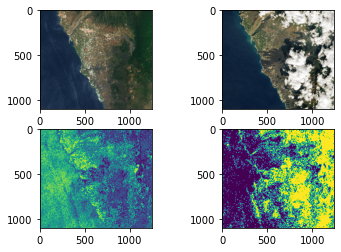

In [8]:
# Convert images to grayscale
imageA = copy.deepcopy(img_list[4])
imageB = copy.deepcopy(img_list[5])
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

In [9]:
# Find contours of key areas of change
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]
print(type(cnts2))
print(len(cnts2))

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=100)[0]
print(majorcnt)

<class 'tuple'>
2542
[ 173  315  633  640  725  768  838  873  909  955 1011 1024 1058 1083
 1087 1131 1205 1650 1670 1682 1705 1823 1899 1929 2138 2144 2227 2528
 2536]


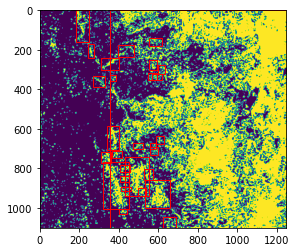

In [10]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the threshold image
ax.imshow(thresh)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

SSIM: 0.46540318026261507


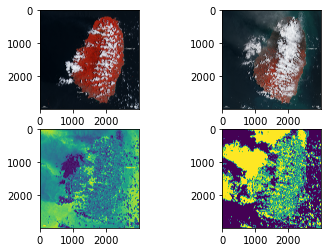

In [11]:
# Convert images to grayscale
imageA = copy.deepcopy(img_list[6])
imageB = copy.deepcopy(img_list[7])
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

SSIM: 0.29076943137412486


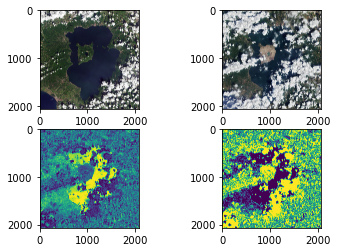

In [12]:
# Convert images to grayscale
imageA = copy.deepcopy(img_list[8])
imageB = copy.deepcopy(img_list[9])
grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Display image differences
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

In [13]:
# Find contours of key areas of change
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]
print(type(cnts2))
print(len(cnts2))

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=100)[0]
print(majorcnt)

<class 'tuple'>
3399
[ 174  350  501  603  665  684  959 1049 1443 1801 1814 1904 2042 2125
 2146 2150 2250 2276 2559 2632 2693 2730 2873 3048 3138 3263 3266 3398]


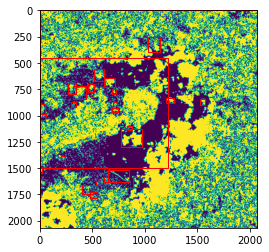

In [14]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the threshold image
ax.imshow(thresh)

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()